# Introduction to financial technical analysis

# 📌 Objectives

By the end of this notebook, students will be able to:

1. **Access and Manipulate Financial Data:**
   - Use the `yfinance` library to retrieve historical stock prices for all companies in the S&P 500 index.

2. **Compute Key Technical Indicators:**
   - Calculate 50-day and 200-day moving averages for each stock in the index.

3. **Detect Trading Signals:**
   - Identify Golden Crosses and Death Crosses as described in technical analysis literature.

4. **Analyze Recent Market Behavior:**
   - Isolate and examine stocks that experienced technical signals (crosses) in the last 14 days.

5. **Visualize Price Trends and Volatility:**
   - Plot historical price movements along with moving averages, and compute volatility around signal dates.

6. **Interpret Technical Indicators in Context:**
   - Reflect on what Golden and Death Crosses signify and how traders may respond to them.

7. **Evaluate Strategy Viability:**
   - Discuss the strengths and limitations of using moving averages as a standalone trading strategy.

8. **Connect Technical Analysis to Broader Market Intelligence:**
   - Explore how sentiment analysis and news (covered in later sections) could complement technical signals.

9. **Develop Critical Thinking About Signal Reliability:**
   - Assess potential risks of false positives and propose improvements or filters to enhance signal accuracy.

10. **Engage in Strategic Reflection:**
    - Answer analytical questions aimed at understanding the utility, risks, and presentation of the strategy to a professional audience.


## Import and install librairies

In [1]:
%pip install pandas
%pip install yfinance
%pip install lxml
%pip install matplotlib


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np
import time


## Get the list of stocks in the S&P 500

In [3]:
# Read and print the stock tickers that make up S&P500
df_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(df_tickers.head())

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [4]:
display(df_tickers)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [5]:
ticker_list = df_tickers['Symbol'].tolist()

## Get the closing price of all 500 stocks in the S&P 500 Index
Use the yfinance library to retrieve the close price of all 500 stocks in the index between 2024-05-01 and 2025-05-01
https://ranaroussi.github.io/yfinance/reference/yfinance.stock.html

In [6]:
start_date = '2024-05-01'
end_date = '2025-05-01'

In [7]:
# CODE HERE
# Use as many coding cells as you need

# Load closing prices
# Make sure you end this coding section by displaying your results: display(df_close)

df_close = pd.DataFrame()

In [8]:
for ticker in ticker_list:
    try:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
        df_close[ticker] = data
        print(f"Downloaded: {ticker}")
    except Exception as e:
        print(f"Failed: {ticker} - {e}")

/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: MMM
Downloaded: AOS


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: ABT
Downloaded: ABBV


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: ACN
Downloaded: ADBE


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: AMD
Downloaded: AES


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: AFL
Downloaded: A


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: APD
Downloaded: ABNB


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: AKAM
Downloaded: ALB


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: ARE


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: ALGN


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: ALLE
Downloaded: LNT


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: ALL
Downloaded: GOOGL


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: GOOG


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: MO
Downloaded: AMZN


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: AMCR


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: AEE


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: AEP


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: AXP


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: AIG
Downloaded: AMT


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: AWK


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: AMP


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: AME
Downloaded: AMGN


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: APH


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: ADI


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: AON
Downloaded: APA


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: APO


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: AAPL
Downloaded: AMAT


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: APTV


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: ACGL


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: ADM
Downloaded: ANET


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: AJG


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: AIZ


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: T
Downloaded: ATO


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: ADSK
Downloaded: ADP
Downloaded: AZO


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: AVB


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: AVY
Downloaded: AXON


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: BKR


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: BALL
Downloaded: BAC


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: BAX
Downloaded: BDX


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: BRK.B
Downloaded: BBY
Downloaded: TECH
Downloaded: BIIB


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: BLK
Downloaded: BX


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: XYZ
Downloaded: BK


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: BA
Downloaded: BKNG


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: BSX
Downloaded: BMY


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: AVGO
Downloaded: BR


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-01 -> 2025-05-01)')


Downloaded: BRO
Downloaded: BF.B


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: BLDR
Downloaded: BG


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: BXP
Downloaded: CHRW


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: CDNS
Downloaded: CZR


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: CPT
Downloaded: CPB
Downloaded: COF


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: CAH
Downloaded: KMX


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: CCL
Downloaded: CARR


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: CAT
Downloaded: CBOE


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: CBRE
Downloaded: CDW


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: COR
Downloaded: CNC


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: CNP
Downloaded: CF


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: CRL
Downloaded: SCHW


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: CHTR
Downloaded: CVX


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarn

Downloaded: CMG
Downloaded: CB


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: CHD
Downloaded: CI


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: CINF


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: CTAS
Downloaded: CSCO


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: C
Downloaded: CFG


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: CLX
Downloaded: CME


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: CMS
Downloaded: KO


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: CTSH
Downloaded: COIN


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data


Downloaded: CL
Downloaded: CMCSA


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: CAG
Downloaded: COP


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: ED
Downloaded: STZ


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: CEG
Downloaded: COO


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: CPRT
Downloaded: GLW


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: CPAY
Downloaded: CTVA


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: CSGP
Downloaded: COST


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: CTRA
Downloaded: CRWD


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: CCI
Downloaded: CSX


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: CMI
Downloaded: CVS


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: DHR
Downloaded: DRI


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: DDOG
Downloaded: DVA


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: DAY
Downloaded: DECK


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: DE
Downloaded: DELL


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: DAL
Downloaded: DVN


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: DXCM
Downloaded: FANG


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: DLR


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: DG
Downloaded: DLTR


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: D
Downloaded: DPZ


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: DASH
Downloaded: DOV


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: DOW
Downloaded: DHI


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: DTE


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: DUK


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: DD


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: EMN


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: ETN
Downloaded: EBAY


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: ECL


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: EIX
Downloaded: EW


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: EA
Downloaded: ELV


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: EMR
Downloaded: ENPH


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: ETR
Downloaded: EOG


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: EPAM
Downloaded: EQT


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: EFX
Downloaded: EQIX


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: EQR
Downloaded: ERIE


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: ESS
Downloaded: EL


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: EG
Downloaded: EVRG


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: ES


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: EXC
Downloaded: EXE


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: EXPE
Downloaded: EXPD


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: EXR
Downloaded: XOM


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: FFIV
Downloaded: FDS


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: FICO
Downloaded: FAST


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: FRT
Downloaded: FDX


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: FIS
Downloaded: FITB


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: FSLR
Downloaded: FE


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: FI
Downloaded: F


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: FTNT
Downloaded: FTV


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: FOXA
Downloaded: FOX


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: BEN
Downloaded: FCX


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: GRMN
Downloaded: IT


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: GE
Downloaded: GEHC


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: GEV
Downloaded: GEN


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: GNRC
Downloaded: GD


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: GIS
Downloaded: GM


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: GPC
Downloaded: GILD


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: GPN


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: GL
Downloaded: GDDY


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: GS


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: HAL
Downloaded: HIG


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: HAS
Downloaded: HCA


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: DOC
Downloaded: HSIC


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: HSY
Downloaded: HPE


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: HLT
Downloaded: HOLX


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: HD
Downloaded: HON


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: HRL
Downloaded: HST


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: HWM


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: HPQ
Downloaded: HUBB


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data


Downloaded: HUM
Downloaded: HBAN


/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: HII
Downloaded: IBM


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: IEX
Downloaded: IDXX


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: ITW
Downloaded: INCY


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: IR
Downloaded: PODD


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: INTC
Downloaded: ICE


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: IFF


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: IP
Downloaded: IPG


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: INTU
Downloaded: ISRG


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: IVZ
Downloaded: INVH


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: IQV
Downloaded: IRM


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: JBHT
Downloaded: JBL


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: JKHY
Downloaded: J


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: JNJ
Downloaded: JCI


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: JPM
Downloaded: K


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: KVUE
Downloaded: KDP


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: KEY
Downloaded: KEYS


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: KMB
Downloaded: KIM


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: KMI
Downloaded: KKR


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: KLAC
Downloaded: KHC


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: KR
Downloaded: LHX


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: LH
Downloaded: LRCX


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: LW


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: LVS
Downloaded: LDOS


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: LEN
Downloaded: LII


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: LLY
Downloaded: LIN


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: LYV
Downloaded: LKQ


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: LMT
Downloaded: L


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: LOW
Downloaded: LULU


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: LYB
Downloaded: MTB


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: MPC
Downloaded: MKTX


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: MAR


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: MMC
Downloaded: MLM


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: MAS
Downloaded: MA


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: MTCH
Downloaded: MKC


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: MCD
Downloaded: MCK


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: MDT


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: MRK
Downloaded: META


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: MET
Downloaded: MTD


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: MGM
Downloaded: MCHP


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: MU
Downloaded: MSFT


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: MAA
Downloaded: MRNA


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: MHK
Downloaded: MOH


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: TAP
Downloaded: MDLZ


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: MPWR
Downloaded: MNST


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: MCO
Downloaded: MS


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: MOS


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: MSI
Downloaded: MSCI


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: NDAQ
Downloaded: NTAP


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: NFLX
Downloaded: NEM


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: NWSA
Downloaded: NWS


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: NEE
Downloaded: NKE


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: NI
Downloaded: NDSN


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: NSC


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: NTRS
Downloaded: NOC


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: NCLH
Downloaded: NRG


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: NUE
Downloaded: NVDA


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: NVR
Downloaded: NXPI


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: ORLY
Downloaded: OXY


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: ODFL
Downloaded: OMC


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: ON


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: OKE
Downloaded: ORCL


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: OTIS
Downloaded: PCAR


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: PKG
Downloaded: PLTR


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: PANW
Downloaded: PARA


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: PH
Downloaded: PAYX


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: PAYC
Downloaded: PYPL


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: PNR
Downloaded: PEP


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: PFE
Downloaded: PCG


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: PM
Downloaded: PSX


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: PNW
Downloaded: PNC


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: POOL
Downloaded: PPG


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: PPL
Downloaded: PFG


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: PG
Downloaded: PGR


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: PLD
Downloaded: PRU


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: PEG
Downloaded: PTC


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: PSA
Downloaded: PHM


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: PWR
Downloaded: QCOM


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: DGX
Downloaded: RL


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: RJF
Downloaded: RTX


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: O
Downloaded: REG


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: REGN
Downloaded: RF


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: RSG
Downloaded: RMD


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: RVTY


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: ROK
Downloaded: ROL


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: ROP
Downloaded: ROST


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: RCL
Downloaded: SPGI


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: CRM
Downloaded: SBAC


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: SLB


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: STX
Downloaded: SRE


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: NOW
Downloaded: SHW


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: SPG


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: SWKS


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: SJM
Downloaded: SW


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: SNA
Downloaded: SOLV


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: SO


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: LUV
Downloaded: SWK


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: SBUX
Downloaded: STT


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: STLD
Downloaded: STE


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: SYK
Downloaded: SMCI


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: SYF
Downloaded: SNPS


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: SYY
Downloaded: TMUS


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: TROW
Downloaded: TTWO


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: TPR


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: TRGP
Downloaded: TGT


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: TEL


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: TDY
Downloaded: TER


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: TSLA
Downloaded: TXN


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: TPL
Downloaded: TXT


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: TMO
Downloaded: TJX


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: TKO
Downloaded: TTD


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: TSCO
Downloaded: TT


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: TDG
Downloaded: TRV


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: TRMB
Downloaded: TFC


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: TYL


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: TSN
Downloaded: USB


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: UBER


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: UDR
Downloaded: ULTA


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: UNP
Downloaded: UAL


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: UPS
Downloaded: URI


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: UNH
Downloaded: UHS


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: VLO
Downloaded: VTR


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: VLTO
Downloaded: VRSN


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: VRSK
Downloaded: VZ


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: VRTX
Downloaded: VTRS


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: VICI
Downloaded: V


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']


Downloaded: VST


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: VMC
Downloaded: WRB


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: GWW
Downloaded: WAB


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: WBA
Downloaded: WMT


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: DIS
Downloaded: WBD


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: WM
Downloaded: WAT


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: WEC
Downloaded: WFC


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: WELL
Downloaded: WST


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: WDC
Downloaded: WY


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: WSM
Downloaded: WMB


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: WTW
Downloaded: WDAY


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: WYNN
Downloaded: XEL


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: XYL
Downloaded: YUM


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Close']
/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data
/tmp/ipython-input-8-2085981215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True


Downloaded: ZBRA
Downloaded: ZBH
Downloaded: ZTS


/tmp/ipython-input-8-2085981215.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close[ticker] = data


In [9]:
display(df_close)

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,95.778595,81.281311,103.735451,154.714783,293.442108,469.390015,144.270004,17.218019,82.391685,137.376266,...,36.111885,250.928619,244.960007,91.453201,51.484390,129.094391,132.078354,309.049988,118.202553,156.223297
2024-05-02,94.192650,82.027466,103.374352,153.844193,295.092773,476.570007,146.160004,17.938202,81.875336,136.217361,...,36.731380,248.751328,250.850006,93.958237,51.493961,134.052750,131.824631,312.709991,117.115036,164.827911
2024-05-03,94.523460,82.773605,103.354828,156.695099,298.403870,486.179993,150.600006,17.691824,81.066711,138.129074,...,36.855278,248.258743,255.779999,95.378403,51.934322,135.255386,131.112137,309.589996,120.278709,164.670197
2024-05-06,93.978592,83.598312,103.101067,155.681015,300.712830,493.589996,155.779999,17.890820,82.547562,139.278091,...,37.226978,249.322769,249.910004,96.522430,52.039635,137.216995,132.907913,315.790009,119.191200,163.566269
2024-05-07,92.956993,83.667046,103.618340,155.508804,305.232483,492.269989,154.429993,17.852917,82.498856,139.931839,...,37.274628,251.086227,249.429993,95.891258,52.671459,138.035187,132.644409,317.869995,120.051323,166.030365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,138.203125,64.968727,128.801849,178.825470,291.410004,360.910004,94.470001,9.941888,108.540672,106.795090,...,59.113911,306.132263,236.869995,81.371361,69.709930,115.241966,146.859604,244.080002,101.237473,151.792435
2025-04-25,136.650742,64.660294,128.274216,184.466751,293.390015,367.720001,96.650002,9.873120,107.347260,106.056648,...,58.538738,301.276978,239.529999,81.900002,68.430580,115.730400,146.580978,246.240005,101.247452,152.958542
2025-04-28,137.257751,64.451363,128.951172,190.692963,293.250000,368.619995,96.389999,10.010655,107.894241,106.645409,...,59.163494,302.244049,239.820007,81.989769,69.005791,115.550972,147.028778,243.490005,101.496803,153.058212


## Identify Golden and Death Crosses

### Get Moving Averages 50 days and 200 days

In [10]:
# CODE HERE
# Use as many coding cells as you need

# Compute moving averages
# Make sure you end this coding section by displaying your results: display(df_ma50), display(df_ma200)

df_ma50 = df_close.rolling(window=50).mean() # 50-days

display(df_ma50)

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,143.654412,65.219248,129.695851,194.882048,322.755805,401.392800,100.5516,11.069880,106.393994,118.589775,...,56.881933,325.769607,243.521401,82.616266,68.725403,120.092335,151.386326,277.851799,105.303733,158.931158
2025-04-25,143.439081,65.214074,129.675177,194.779480,320.885378,399.492000,100.2502,11.069094,106.504835,117.960954,...,56.975109,325.452575,243.153601,82.695181,68.768236,119.825021,151.415763,275.718199,105.358225,158.535975
2025-04-28,143.238862,65.189798,129.642278,194.792594,318.998219,397.680000,99.9418,11.070076,106.604067,117.376370,...,57.028886,325.088865,242.747401,82.734114,68.802902,119.530667,151.409784,274.119598,105.399390,158.320589


In [11]:
df_ma200 = df_close.rolling(window=200).mean() # 200-days

display(df_ma200)

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,132.609984,73.531205,116.973860,183.261853,340.475853,478.509449,131.58170,13.862820,104.768169,133.080366,...,51.156786,303.742411,247.403701,85.165791,64.041626,125.549300,136.723923,346.199799,106.728763,172.881444
2025-04-25,132.804895,73.458212,117.119245,183.380333,340.478540,477.517949,131.17945,13.828417,104.869224,132.988337,...,51.245132,303.976909,247.485901,85.156247,64.130069,125.467794,136.835707,345.854800,106.711042,172.787550
2025-04-28,132.993143,73.373081,117.261134,183.529515,340.493398,476.538299,130.74160,13.793564,104.966743,132.891064,...,51.336073,304.212190,247.569601,85.151355,64.220807,125.371802,136.937422,345.453200,106.688921,172.697851


As it seems, there were some days that doesn´t have a numeric value.

### Detecting Golden and Death Crosses in the last 14 days

In [12]:
# CODE HERE
# Use as many coding cells as you need

# define a function that detects golden and death crosses in the last 14 days for all stocks

def detect_crosses(ma50: pd.DataFrame, ma200: pd.DataFrame, days: int = 14):
    golden_crosses = []
    death_crosses = []

    # +1 for yesterday's cut and today's cut comparation
    ma50_recent = ma50.tail(days + 1)
    ma200_recent = ma200.tail(days + 1)

    for ticker in ma50.columns:
        series_50 = ma50_recent[ticker]
        series_200 = ma200_recent[ticker]

        for i in range(1, len(series_50)):
            prev_50, curr_50 = series_50.iloc[i - 1], series_50.iloc[i]
            prev_200, curr_200 = series_200.iloc[i - 1], series_200.iloc[i]
            date = series_50.index[i]

            if pd.notna(prev_50) and pd.notna(prev_200) and pd.notna(curr_50) and pd.notna(curr_200): # No NaN values
                # Golden Cross:
                if prev_50 < prev_200 and curr_50 >= curr_200:
                    golden_crosses.append({'Date': date, 'Ticker': ticker})
                # Death Cross:
                elif prev_50 > prev_200 and curr_50 <= curr_200:
                    death_crosses.append({'Date': date, 'Ticker': ticker})

    df_golden = pd.DataFrame(golden_crosses)
    df_death = pd.DataFrame(death_crosses)
    return df_golden, df_death


In [13]:
df_golden_cross_14d, df_death_cross_14d = detect_crosses(df_ma50, df_ma200, days=14)

In [14]:
# use the display function to show as many intermediary results
# for example display(df_golden_cross_14d)

display(df_golden_cross_14d)

,Date,Ticker
0,2025-04-21,AMT
1,2025-04-30,CI
2,2025-04-17,EW
3,2025-04-30,INVH
4,2025-04-21,KDP
5,2025-04-28,MOH
6,2025-04-28,MDLZ
7,2025-04-14,NEM
8,2025-04-29,SBAC
9,2025-04-25,SJM


In [15]:
# use the display function to show as many intermediary results
# for example display(df_death_cross_14d)

display(df_death_cross_14d)

,Date,Ticker
0,2025-04-10,ACN
1,2025-04-21,APD
2,2025-04-22,AMZN
3,2025-04-22,AXP
4,2025-04-24,AMP
...,...,...
57,2025-04-30,VST
58,2025-04-21,WAB
59,2025-04-22,DIS
60,2025-04-28,WAT


#### Golden crosses
List the first top companies in alphabetical order (by there symbol or ticker) that had a golden cross in the last 14 days:

| Ticker | Company Name                      |
|--------|-----------------------------------|
| AMT    | American Tower Corporation        |
| CI     | The Cigna Group                   |
| EW     | Edwards Lifesciences              |
| INVH   | Invitation Homes                  |
| KDP    | Keurig Dr Pepper                  |
| MDLZ   | Mondelez International            |
| MOH    | Molina Healthcare                 |
| NEM    | Newmont Corporation               |
| SBAC   | SBA Communications                |
| SJM    | The J.M. Smucker Company          |

#### Death crosses
List the first 10 companies in alphabetical order (by there symbol or ticker) that had a death cross in the last 14 days:

| Ticker | Company Name                      |
|--------|-----------------------------------|
| ACN    | Accenture                         |
| ADSK   | Autodesk                          |
| AME    | AMETEK                            |
| AMP    | Ameriprise Financial              |
| AMZN   | Amazon.com                        |
| APD    | Air Products & Chemicals          |
| APO    | Apollo Global Management          |
| AXP    | American Express                  |
| BAC    | Bank of America                   |
| BLK    | BlackRock                         |


### Visualization of the results
(in alphabetical order)

In [16]:
top_golden = df_golden_cross_14d.sort_values('Ticker').head(10)
display(top_golden["Ticker"])

,Ticker
0,AMT
1,CI
2,EW
3,INVH
4,KDP
6,MDLZ
5,MOH
7,NEM
8,SBAC
9,SJM


In [17]:
top_death = df_death_cross_14d.sort_values('Ticker').head(10)
display(top_death["Ticker"])

,Ticker
0,ACN
7,ADSK
5,AME
4,AMP
2,AMZN
1,APD
6,APO
3,AXP
8,BAC
9,BLK


#### Compute the volatility of every stock and print it in the title of each plot

In [18]:
# CODE HERE
# Use as many coding cells as you need

# Compute the volatility of every stock in the S&P 500

df_returns = df_close.pct_change(fill_method=None) # Daily returns for analysis

In [19]:
df_volatility = df_returns.std()

In [20]:
df_volatility = df_volatility.to_frame(name='Volatility')
df_volatility = df_volatility.sort_values('Volatility', ascending=False)
display(df_volatility)

,Volatility
SMCI,0.071376
COIN,0.052767
VST,0.047544
PLTR,0.045638
TSLA,0.045489
...,...
ATO,0.010589
KO,0.010369
EVRG,0.009885
BRK.B,NaN


#### Plot top 10 stocks that had Golden Crosses in the last 14 days

- You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
- For each plot, put the volatility of the stock in the title of the plot

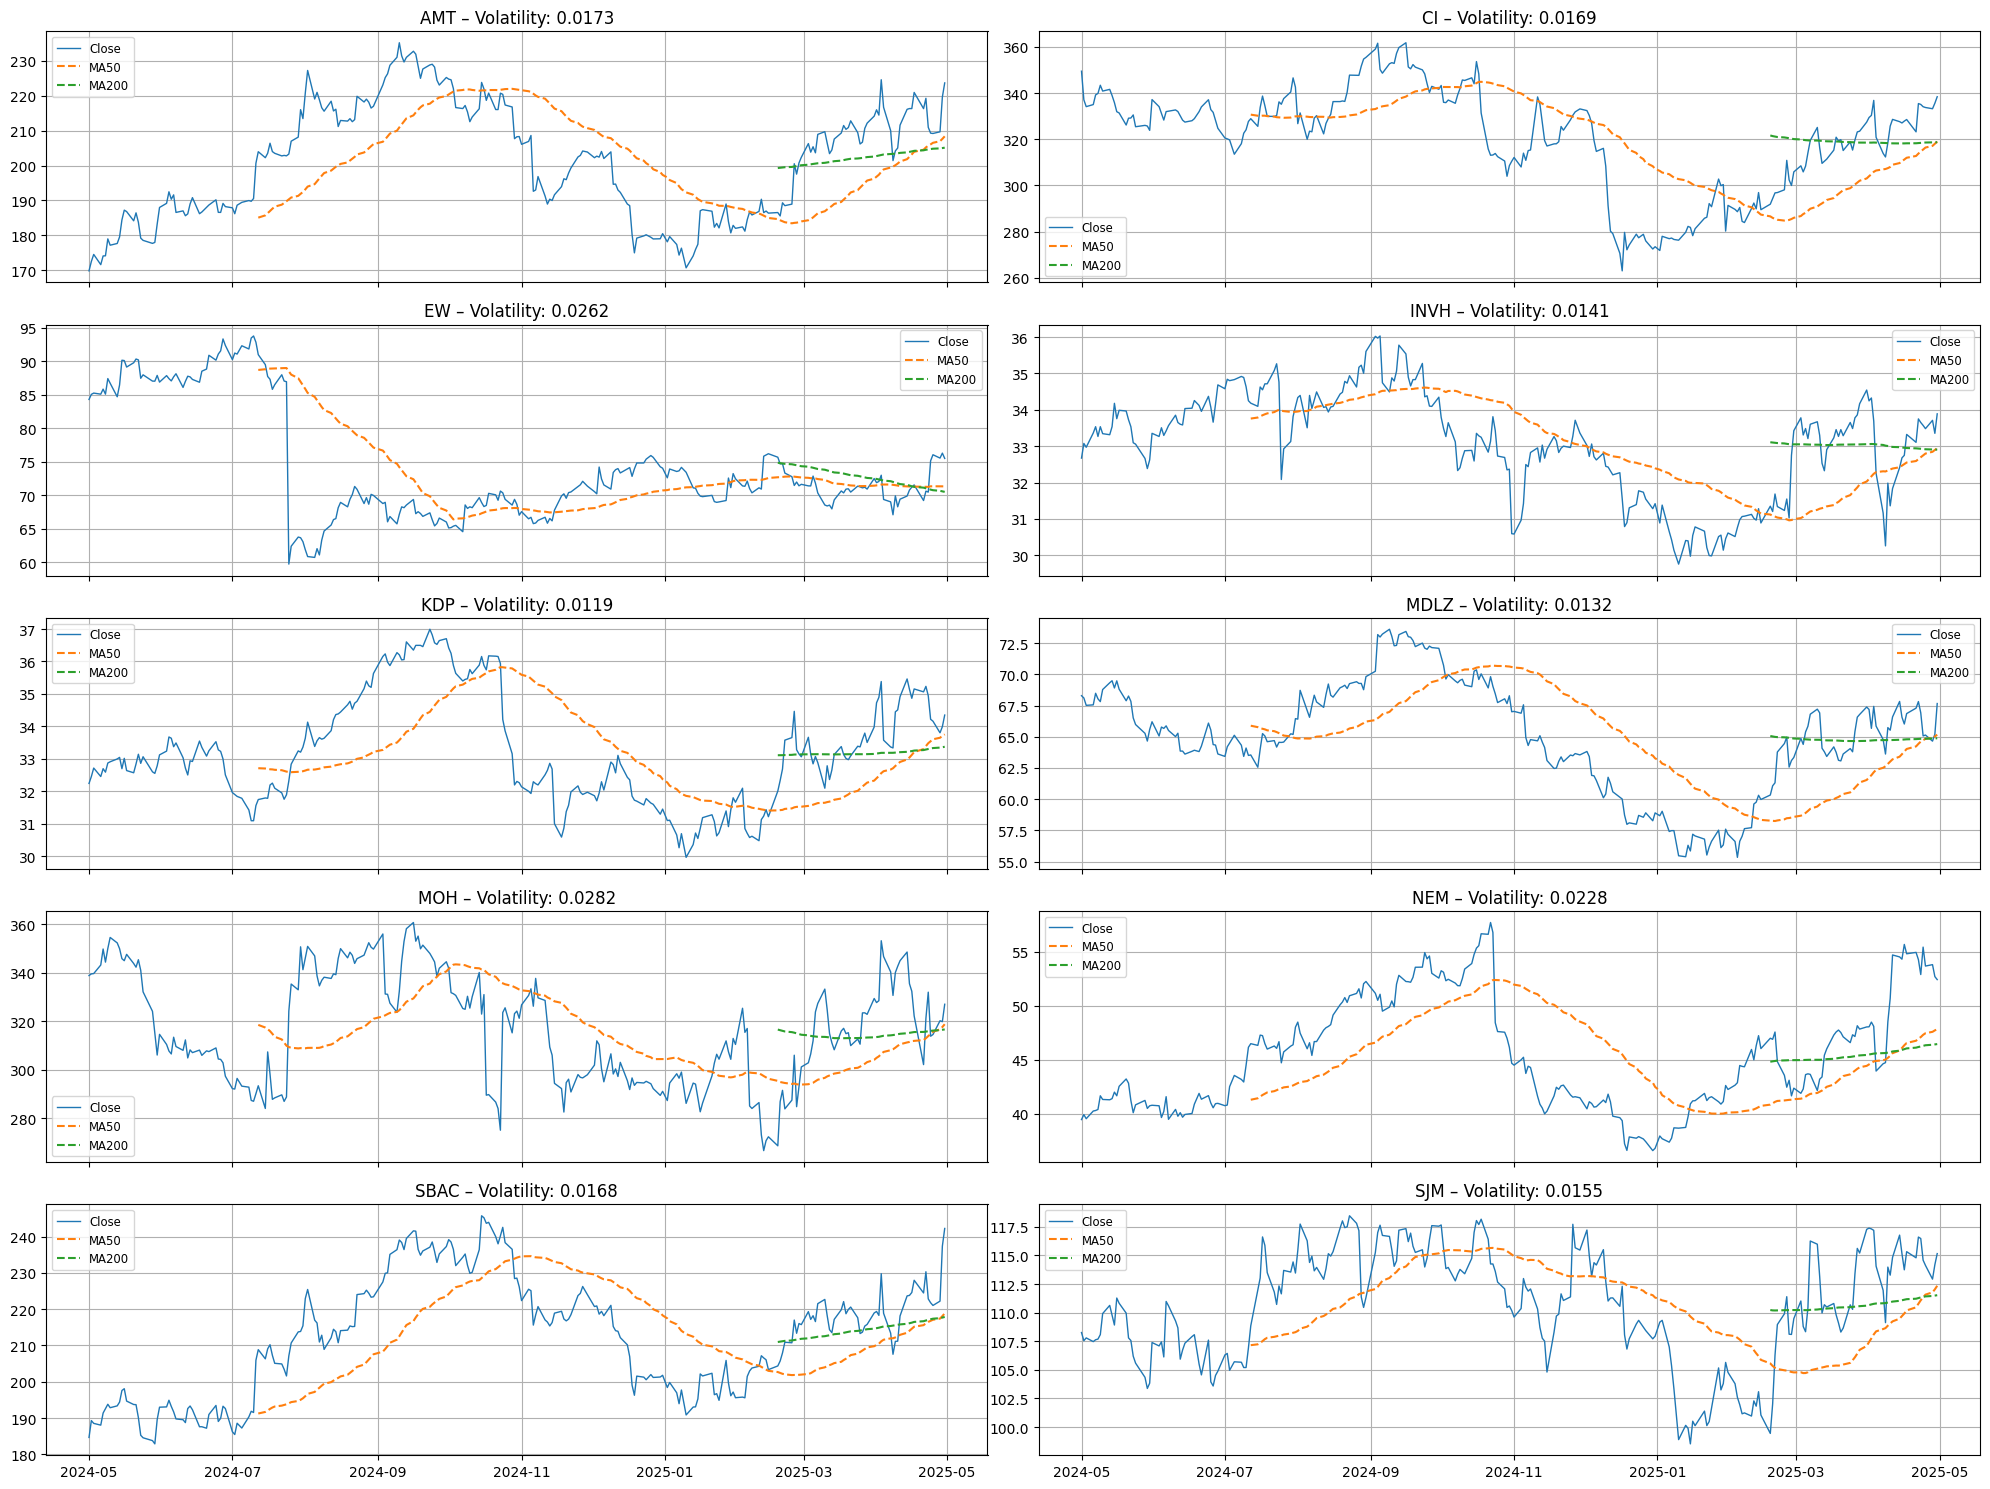

In [21]:
# CODE HERE
# Visualize the results here

top_10_golden_tickers = df_golden_cross_14d.sort_values('Ticker')['Ticker'].head(10).tolist()

fig, axes = plt.subplots(5, 2, figsize=(20, 15), sharex=True)
axes = axes.flatten()

for i, ticker in enumerate(top_10_golden_tickers):
    ax = axes[i]
    ax.plot(df_close[ticker], label='Close', linewidth=1)
    ax.plot(df_ma50[ticker], label='MA50', linestyle='--')
    ax.plot(df_ma200[ticker], label='MA200', linestyle='--')

    vol = df_volatility.loc[ticker, 'Volatility']
    ax.set_title(f"{ticker} – Volatility: {vol:.4f}")
    ax.grid(True)
    ax.legend(fontsize='small')

plt.tight_layout()
plt.show()

### Plot top 10 stocks that had Death Crosses in the last 14 days

You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
For each plot, put the volatility of the stock in the title of the plot

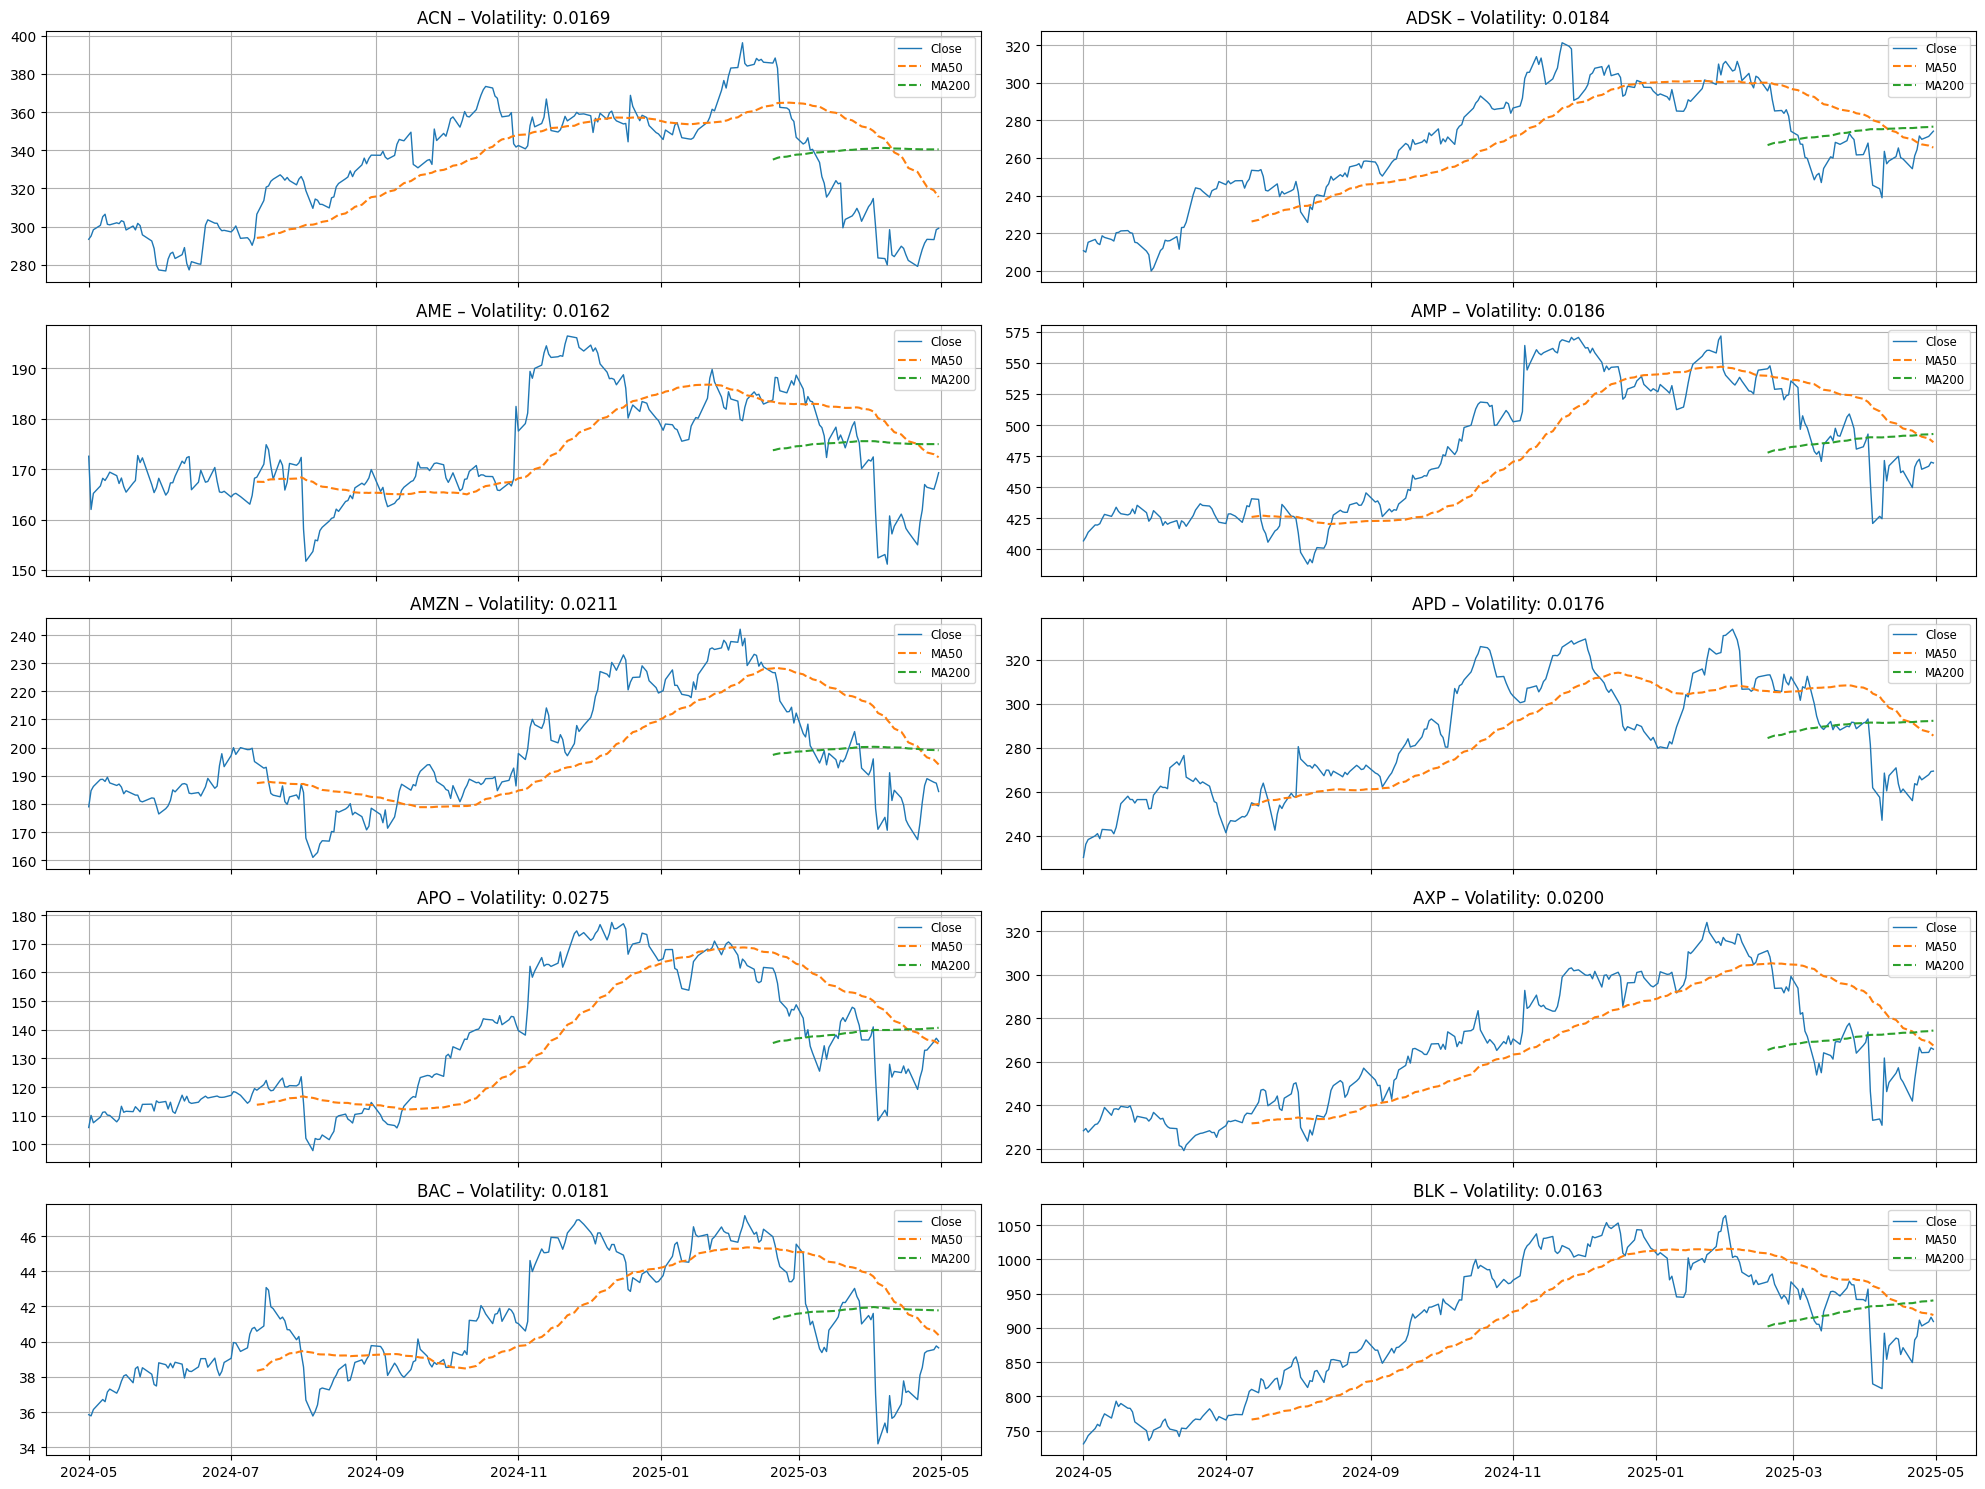

In [22]:
# CODE HERE
# Visualize the results here

top_10_death_tickers = df_death_cross_14d.sort_values('Ticker')['Ticker'].head(10).tolist()

fig, axes = plt.subplots(5, 2, figsize=(20, 15), sharex=True)
axes = axes.flatten()

for i, ticker in enumerate(top_10_death_tickers):
    ax = axes[i]
    ax.plot(df_close[ticker], label='Close', linewidth=1)
    ax.plot(df_ma50[ticker], label='MA50', linestyle='--')
    ax.plot(df_ma200[ticker], label='MA200', linestyle='--')

    vol = df_volatility.loc[ticker, 'Volatility']
    ax.set_title(f"{ticker} – Volatility: {vol:.4f}")
    ax.grid(True)
    ax.legend(fontsize='small')

plt.tight_layout()
plt.show()

## Question section

### Understanding concepts

#### What is a Golden Cross and what does it typically signal to investors?

A Golden Cross occurs when a stock’s short-term moving average (typically the 50-day) crosses above its long term moving average (usually the 200-day), signaling a potential shift from a downtrend to an uptrend. This pattern is widely interpreted as a bullish indicator, suggesting that buying momentum is increasing. Investors and traders often view it as a signal to enter long positions, anticipating continued price appreciation.


#### What is a Death Cross and how might market participants react to it?

A Death Cross happens when the 50-day moving average of a stock falls below its 200-day moving average, indicating weakening price momentum and the possible start of a downtrend. This pattern is considered a bearish signal by many market participants, prompting actions such as selling assets, reducing risk exposure, or initiating short positions, especially if confirmed by high trading volume or broader market weakness.


#### Why might moving averages (MA50, MA200) be used as indicators in technical analysis?

Moving averages, such as the 50-day (MA50) and 200-day (MA200), are commonly used in technical analysis because they help smooth out short term price fluctuations and reveal the underlying trend of a stock. By averaging the prices over a fixed number of days, they filter out market noises and make it easier to identify whether a stock is in an upward or downward trajectory, very helpful to investors. The MA50 reflects more recent market sentiment, while the MA200 represents a longer-term trend, one complemeting the other. Analysts and traders watch for crossovers between these averages, like the Golden Cross or Death Cross as potential signals of trend reversals or continuations, aiding in timing entry or exit points in the market.


#### Why are the last 14 days used to check for crosses? What are the implications of this choice?

The last 14 days are often used to check for Golden or Death Crosses because this window focuses the analysis on recent market activity, allowing investors to detect fresh signals that may still be actionable, the 14-day range offers a balance between recency and signal reliability.


#### How does volatility (e.g., measured using percentage change standard deviation) help contextualize the price movement around crosses?

Volatility, as measured by standard deviation of percentage price changes, helps contextualize price movements around crosses by quantifying the degree of price fluctuation relative to its average, so it helps assess the reliability of moving average crosses by providing context about price stability. A crossover during low volatility suggests a steady trend shift, making the signal more trustworthy. In contrast, high volatility may indicate market noise, increasing the risk of false signals.

### Backtesting and evaluation

#### How would you measure whether Golden Crosses actually lead to profitable trades?

To evaluate whether Golden Crosses lead to profitable trades, one can perform a backtest by simulating trades where a stock is bought at the time of the Golden Cross and sold after a fixed period (like 30 or 60 days) or upon a subsequent Death Cross. The performance of these trades can be compared to benchmarks such as the stock’s average return or the broader market. Key metrics like average return, win rate, and risk-adjusted performance are used to determine if the strategy consistently yields superior results over time and across different stocks.


#### What are the risks of using only technical indicators like moving averages without incorporating fundamentals?

Relying solely on technical indicators like moving averages carries several risks. These indicators reflect only past price behavior and ignore a company’s fundamental health, such as earnings, growth potential, or debt. This can lead to investment decisions based on patterns that lack real financial substance. Moreover, technical signals can generate false positives, especially in highly volatile or low liquidity markets. Without considering fundamentals, investors may misjudge a stock’s true value or long-term outlook. Additionally, unexpected sociopolitical events like geopolitical conflicts, regulatory changes, or economic shocks can move markets sharply and unpredictably, rendering purely technical strategies insufficient for managing risk.

#### How would you improve this strategy to reduce false signals (e.g., a Golden Cross that doesn’t lead to a price increase)?

To reduce false signals in technical strategies, one can combine multiple indicators to confirm trend strength, such as using volume spikes, momentum indicators like RSI or MACD, and a longer moving average windows. Applying filters based on broader market trends or integrating basic fundamental analysis can also improve reliability. Additionally, setting stop-losses and profit targets helps manage risk when signals fail.

For example, a false Golden Cross might occur when the MA50 crosses above the MA200, but the price quickly reverses due to weak market conditions or low trading volume.

### AI Integration


#### Could sentiment from news (future project part) help validate or invalidate these technical signals?

Yes, sentiment from news can help validate or invalidate technical signals like a Golden or Death Cross. Positive sentiment—such as favorable earnings, new partnerships, or strong market outlook can support a bullish signal and increase confidence in a trend continuation. Conversely, negative sentiment like lawsuits, regulatory issues, or economic concerns can cast doubt on a bullish crossover or reinforce a bearish one. Incorporating news sentiment provides context beyond price patterns, helping to filter out false signals and align technical indicators with real world developments.

### Critical thinking

#### From a trading perspective, is this strategy actionable on its own?

From a trading perspective, the Golden/Death Cross strategy is not fully actionable on its own. While it provides a clear and easy to follow signal, it lacks context about market conditions, fundamentals, and volatility, which are crucial for decision making. Relying solely on moving average crossovers can lead to delayed entries, false signals, or missed risks. For better performance, the strategy should be combined with confirmation indicators, news sentiment, or risk management tools to make it more robust and reliable in real trading scenarios.


#### Based on the volatility observed post-Golden Cross, do these crosses consistently predict upward movement?

Based on observed volatility after Golden Crosses, these signals do not consistently predict upward movement. While some crosses are followed by steady gains, others occur during volatile periods where prices reverse or stagnate shortly after the signal. High volatility can indicate uncertainty rather than a clear trend, increasing the chance of false positives. Therefore, the effectiveness of Golden Crosses varies, and they should be used with additional confirmation tools rather than as standalone predictors.



#### If you had to present this analysis to a portfolio manager, what conclusions would you emphasize? What caveats would you include?

Conclusions in 2 bullet points:

* Golden and Death Crosses offer a simple way to identify trend shifts across S&P 500 stocks and can highlight timely opportunities when confirmed with other indicators.
* Some crosses, especially those with low volatility and positive sentiment, align with sustained price movements, suggesting potential for tactical positioning.


Caveats in 2 or 3 bullet points:

* Crosses do not consistently predict price direction many signals occur during volatile or noisy periods, leading to false positives.

* The strategy lacks context on fundamentals or external events like earnings reports or geopolitical news, which can quickly reverse technical signals.

* Relying solely on technical patterns without risk controls or validation from other sources may result in suboptimal or risky trades.